In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [71]:
df.shape

(159, 7)

In [72]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [73]:
# Average weight of fish is 398.32
# 25% of fish have weight less than 120.
# max weight is 1650
# &5% of fish have length1 less than 32.7

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [75]:
# removing the row where fish weight is 0

In [76]:
df.loc[df['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [78]:
# removing the row from the dataset
df=df.loc[df['Weight']>0,:]
df.shape

(158, 7)

In [79]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

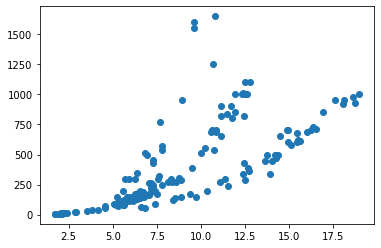

In [80]:
plt.scatter(x='Height',y='Weight',data=df)

In [81]:
# Relationship between height and weight is not linear

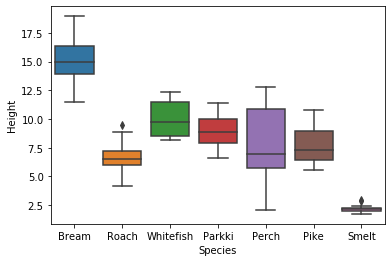

In [82]:
sns.boxplot(x=df['Species'],y=df['Height'])

In [83]:
#bream fishes are longer compared to others
#Height of  perch species is rightskewed

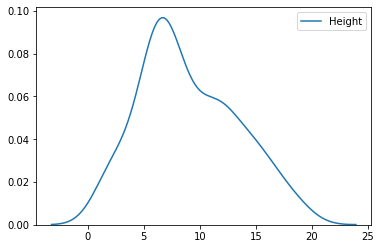

In [84]:
sns.kdeplot(df['Height'])

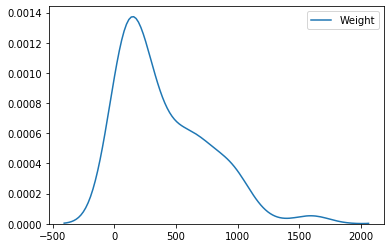

In [85]:
sns.kdeplot(df['Weight']) 

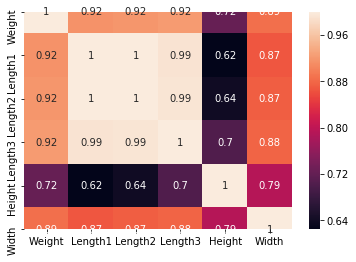

In [86]:
sns.heatmap(df.corr(),annot=True)

In [87]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


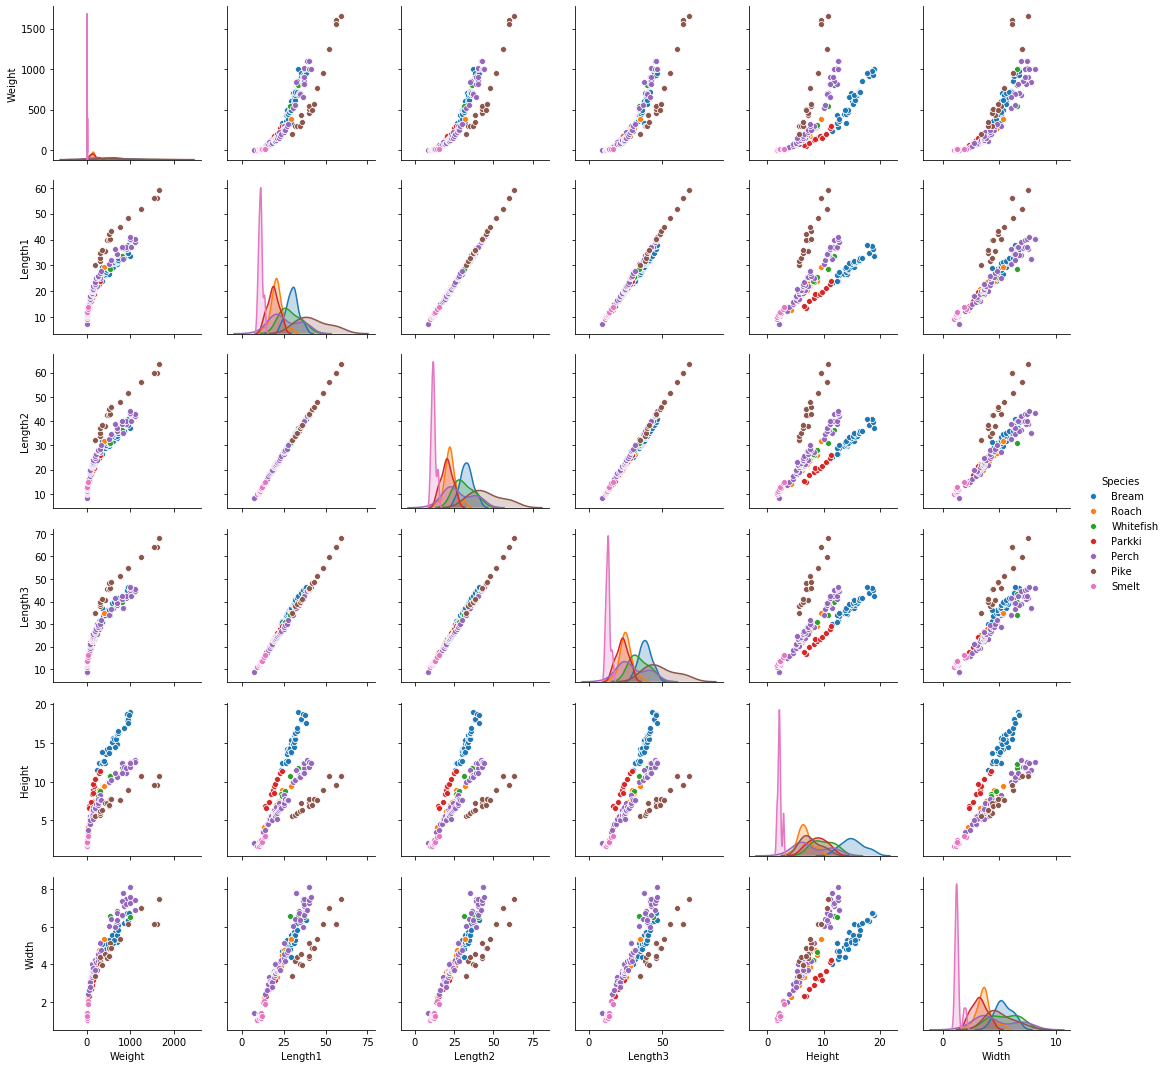

In [88]:
sns.pairplot(df,diag_kind='kde',hue='Species')

# Linear Regression

In [89]:
y=df['Weight']
X=df.drop(columns=['Weight','Species'])

In [90]:
xc=sm.add_constant(X)

lin_reg=sm.OLS(y,xc).fit()
y_pred=lin_reg.predict()

lin_reg.summary()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     235.1
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.27e-69
Time:                        21:55:21   Log-Likelihood:                -981.49
No. Observations:                 158   AIC:                             1975.
Df Residuals:                     152   BIC:                             1993.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -496.8023     29.616    -16.775      0.000    -555.315    -438.290
Length1       63.9695     40.169      1.592      0.113     -15.393     143.332
Length2       -9.1085     41.749     -0.218      0.828     -91.592      73.375
Length3      -28.1189     17.343     -1.621      0.107     -62.383       6.145
Height        27.9262      8.721      3.202      0.002      10.696      45.157
Width         23.4123     20.355      1.150      0.252     -16.804      63.628
==============================================================================
Omnibus:                       21.459   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.402
Skew:                           0.801   Prob(JB):                     6.80e-07
Kurtosis:                       4.323   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#From F-stat result we can say that the coefficients are not 0. The model as a whole is good.
# R2 suggests that 88.5 variation in weight is explained by other features.
#Length 1, length2 and length 3 are highly collinear(df.corr). Hence, I am dropping length2 and length 3.

In [94]:
X=df.drop(columns=['Species','Weight','Length2','Length3'])
X.head()

,Length1,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340


# Running the model again

In [95]:
xc=sm.add_constant(X)

lin_reg=sm.OLS(y,xc).fit()
y_pred=lin_reg.predict()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     386.7
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.90e-71
Time:                        21:55:52   Log-Likelihood:                -983.32
No. Observations:                 158   AIC:                             1975.
Df Residuals:                     154   BIC:                             1987.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -511.4706     28.593    -17.888      0.000    -567.955    -454.986
Length1       22.6047      2.019     11.198      0.000      18.617      26.593
Height        13.5898      3.848      3.532      0.001       5.988      21.191
Width         44.2661     15.321      2.889      0.004      13.999      74.533
==============================================================================
Omnibus:                       19.258   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.095
Skew:                           0.795   Prob(JB):                     9.66e-06
Kurtosis:                       3.991   Cond. No.                         87.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#R2 of the model dropped here.

In [97]:
# Distribution of residuals

In [98]:
lin_reg.resid

0     -105.462289
1     -101.234627
2      -64.871188
3      -90.258362
4      -53.927163
          ...    
154    173.619279
155    171.198805
156    163.620474
157    102.241017
158     96.392989
Length: 158, dtype: float64

Text(0.5, 1.0, 'Distribution of residuals')

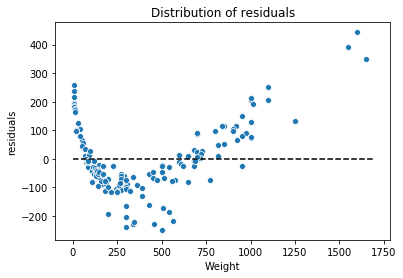

In [99]:
plt.hlines(0,xmin=0,xmax=1700,linestyle='dashed')
sns.scatterplot(x=y,y=lin_reg.resid)
plt.ylabel('residuals')
plt.title('Distribution of residuals')

In [100]:
#The pattern of residuals are non_random which is not good.
#Distribution of residuals should be randomly dispersed,then it will follow a linear regression model
#This clearly suggests that our model is not appropriate.

In [101]:
#We will do the transformation of the data and then we will see

# Applying log transformation to the data

In [126]:
df['log_weight']=np.log(df['Weight'])
df['log_height']=np.log(df['Height'])
df['log_width']=np.log(df['Width'])
df['log_length']=np.log(df['Length1'])

In [127]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,log_weight,log_height,log_width,log_length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,5.488938,2.444085,1.391282,3.144152
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,5.669881,2.524127,1.459917,3.178054
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,5.828946,2.515905,1.546732,3.173878
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,5.894403,2.543961,1.494139,3.269569
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,6.063785,2.521239,1.635885,3.277145


In [128]:
y_log=df['log_weight']
X_log=df.loc[:,['log_length','log_width','log_height']]

In [130]:
X_log.shape

(158, 3)

In [131]:
xc=sm.add_constant(X_log)

lin_reg=sm.OLS(y_log,xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_weight   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9349.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):          5.80e-174
Time:                        21:58:24   Log-Likelihood:                 143.31
No. Observations:                 158   AIC:                            -278.6
Df Residuals:                     154   BIC:                            -266.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7730      0.115    -15.438      0.000      -2.000      -1.546
log_length     1.4295      0.052     27.722      0.000       1.328       1.531
log_width      0.9487      0.062     15.339      0.000       0.827       1.071
log_height     0.6293      0.033     19.111      0.000       0.564       0.694
==============================================================================
Omnibus:                       18.425   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.146
Skew:                          -0.463   Prob(JB):                     7.05e-10
Kurtosis:                       5.355   Cond. No.                         72.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#R2 has improved significantly.

In [133]:
#Distribution of residuals

Text(0.5, 1.0, 'Distribution of residuals')

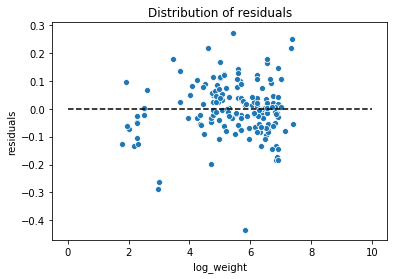

In [134]:
plt.hlines(0,xmin=0,xmax=10,linestyle='dashed')
sns.scatterplot(x=y_log,y=lin_reg.resid)
plt.ylabel('residuals')
plt.title('Distribution of residuals')

In [ ]:
# The residuals are randomly dispersed. 